<a href="https://colab.research.google.com/github/mery01/lab-aplicaciones-multimedia/blob/master/P1_Introduccion_al_procesado_de_imagen_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![uc3mlogo](http://ocw.uc3m.es/periodismo/empresa-informativa/imagenes/logo_uc3m.jpg)

#### Montar sobre Drive

Para ejecutar correctamente este notebook desde Google Colab, es necesario montar el directorio que contiene las imágenes con las que vamos a trabajar.

Para ello se debe subir a Google Drive el directorio que contiene los ficheros de la práctica e indicar la ubicación de dicho directorio mediante el siguiente código:

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# Change to assignment directory ('TDImagen_Practicas/P1' by default)
import os
os.chdir('/content/drive/My Drive/3º/TRATAMIENTO DIGITAL IMÁGEN/LABS MÍOS/P1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Librerías necesarias para la práctica

In [0]:

import numpy  as np
import matplotlib.pyplot as plt # Importa la librería matplotlib
import cv2 #Importa la librería opencv
plt.style.use('default') #Visualizacion por defecto (para eliminar grid en Colab)

# PRACTICA 1


# INTRODUCCIÓN AL PROCESADO DE IMAGEN CON PYTHON

### TRATAMIENTO DIGITAL DE LA IMAGEN
### GRADO EN INGENIERÍA DE SISTEMAS AUDIOVISUALES
### CURSO 2018/2019


1. INTRODUCCIÓN A PYTHON

2. MANEJO DE IMÁGENES EN PYTHON

> 2.1 VISUALIZACIÓN DE UNA IMAGEN

> 2.2 RGB Y HSV

---
## 1. INTRODUCCIÓN A PYTHON 
---
Para llevar a cabo las prácticas de la asignatura, se aconseja realizar una introducción al lenguaje de programación Python, revisando los siguientes capítulos del manual "Scipy Lecture Notes" (www.scipy-lectures.org):

1. Scientific computing with tools and workflow
2. The Python language

En este curso se utilizarán fundamentalmente las siguientes librerías de Python:

-  Numpy
- Scipy
- Matplotlib
- OpenCV

Las primeras tres librerías se introducen en los siguientes capítulos del manual "Scipy Lecture Notes" (www.scipy-lectures.org):

3. NumPy: creating and manipulating numerical data
4. Matplotlib: plotting
5. Scipy: high-level scientific computing

Además, como apoyo al uso de la librería OpenCV, puede consultar los tutoriales incluidos en el siguiente enlace:

https://docs.opencv.org/3.4.3/d6/d00/tutorial_py_root.html

---
## 2. MANEJO DE IMÁGENES EN PYTHON
---


#### 2.1 VISUALIZACIÓN DE UNA IMAGEN

Tanto la librería Matplotlib como la librería OpenCV contienen funciones para leer imágenes y devolverlas en forma de array.

En primer lugar importaremos las librerías:

El comando
```python
X = plt.imread(‘PEPPERS.PNG');
```
nos permite leer una imagen.

La variable X almacena una matrix de 2 o 3 dimensiones: 2 en el caso de una imagen en escala de grises y 3 dimensiones en el caso de una imagen a color.

En el primer caso, las dimensiones de la matriz son NxM y cada element contiene la intensidad del pixel correspondiente. En el segundo caso (imagen a color), las dimensiones son NxMx3, i.e., tenemos 3 componentes de intensidad en cada pixel, una por cada component de rojo, verde y azul (R, G, B).

Otra alternativa es la librería opencv, que para leer imágenes en 2D:
```python
X = cv2.imread(‘PEPPERS.PNG',0);
```

Para leer imágenes en 3D:
```python
X = cv2.imread(‘PEPPERS.PNG');
```
En este caso, almacena información en formato BGR (coloca primero la componente azul, después la verde y al final la roja). Para pasar la matriz a formato RGB, a continuación podemos usar el siguiente comando:

```python
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
```

Para mostrar una imagen podemos utilizar el siguiente comando:

```python
plt.imshow(image,cmap=colormap)
plt.show()
```

Si no se especifica el colormap, matplotlib mostrará:

* Para imágenes 2D un mapa de calor


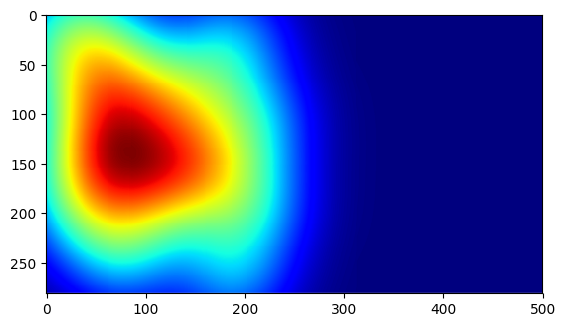

In [0]:
#@title
logo = cv2.imread('notebook_images/heatmap.png')
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))
plt.show()

* Cuando se tienen 3 componentes asumirá que es una imagen RGB

Si quieres mostrar un mapa de color diferente lo debes especificar como parámetro, por ejemplo, para usar una escala de colores rojos en una imagen 2D se puede usar:

```python
plt.imshow(image,cmap="Reds")
```

Aquí podéis ver un listado de mapas de color disponibles:

[https://matplotlib.org/tutorials/colors/colormaps.html](https://matplotlib.org/tutorials/colors/colormaps.html)

También podéis crear vuestros propios mapas de colores ofreciendo un rango de visualización:

```python
from matplotlib.colors import LinearSegmentedColormap
cm = LinearSegmentedColormap.from_list('name', [minimumColor,maximumColor], N=numcolors)
plt.imshow(image,cmap=cm)
```


#### Ejercicio 1
*	Lee la imagen ‘lena.tif’ (utilizando imread) y muéstrala utilizando imshow. 
*	Muestra la imagen utilizando una paleta de 8 niveles de gris (creando tu propio colormap).
*	Escribe un script de Python que genere una imagen como la siguiente (mostrando claramente los 8 niveles de gris).  


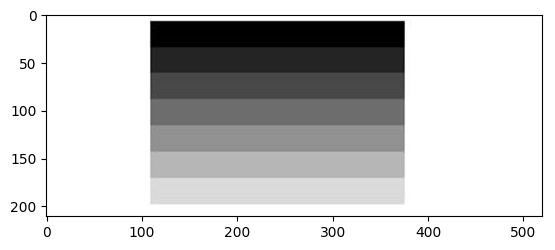

In [0]:
#@title
logo = cv2.imread('notebook_images/Gray8.png')
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))
plt.show()

*	Repita el ejercicio anterior, generando ahora una figura similar para un mapa de color
que contenga las 8 esquinas del cubo RGB: (0,0,0),(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0),(1,1,1).
* De acuerdo con el listado de mapas de color disponibles ([https://matplotlib.org/tutorials/colors/colormaps.html](https://matplotlib.org/tutorials/colors/colormaps.html)), ¿cuál de los mapas de color preconfigurados sería adecuado para el ejemplo mencionado de las imágenes infrarrojas?
Esto es, aquel que asigna colores cercanos al rojo (cálidos) a los valores de
intensidad elevada y colores cercanos al azul (fríos) a los de intensidad baja. Repita
el ejercicio anterior, generando una figura similar que represente la paleta de color
elegida.

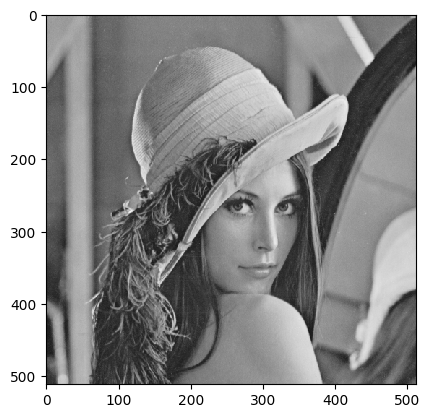

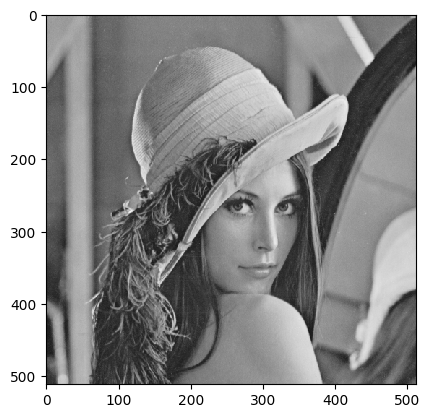

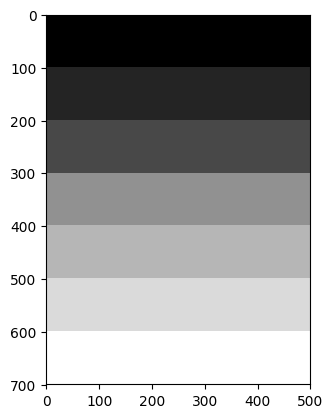

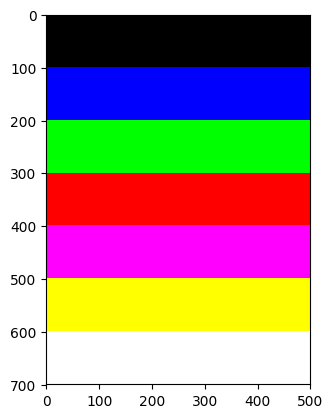

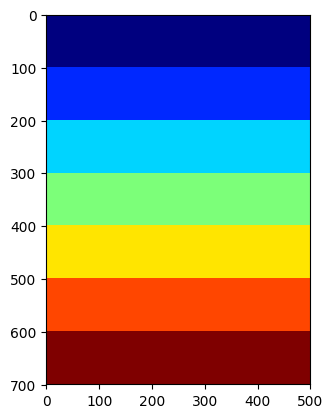

In [0]:
# --WRITE YOUR CODE HERE--

#APARTADO 1

img = cv2.imread('lena.tif');
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img);
plt.show();

# APARTADO 2

from matplotlib.colors import LinearSegmentedColormap

cm = LinearSegmentedColormap.from_list('cm1', [(0,0,0),(1,1,1)], N=8);
plt.imshow(img,cmap=cm);
plt.show();

# APARTADO 3
m = np.ones((100,500));
m_1 = m*1;
m_2 = m*2;
m_3 = m*3;
m_4 = m*4;
m_5 = m*5;
m_6 = m*6;
m_7 = m*7;

IM = np.concatenate((m_1,m_2,m_3,m_4,m_5,m_6,m_7),axis=0);
plt.imshow(IM,cmap=cm);
plt.show();

# APARTADO 4

cmcuadrado = [(0,0,0),(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0),(1,1,1)];
cm2 = LinearSegmentedColormap.from_list('cm2',cmcuadrado, N=8);
plt.imshow(IM,cmap=cm2);
plt.show();

# APARTADO 5

plt.imshow(IM,cmap='jet');
plt.show();


#### Ejercicio 2

Lee la imagen ‘peppers.png’ (comprueba sus dimensiones: MxNx3). Dibuja la componente roja de las siguientes formas: 
* Extrae la componente roja como una matriz de dos dimensiones y muéstrala en escala de grises. ¿Cómo es posible que la componente R de algunos pimientos naranjas o
incluso de la cabeza de ajo se mayor que la de algunos pimientos rojos?
* Muéstrala de nuevo, ahora en pseudocolor, cambiando el mapa de colores (puedes usar por ejemplo HSV o JET).
* Visualícela en rojo, solamente con la componente R. Para ello, ponga a cero las bandas
G y B, y visualice la imagen en color resultante.


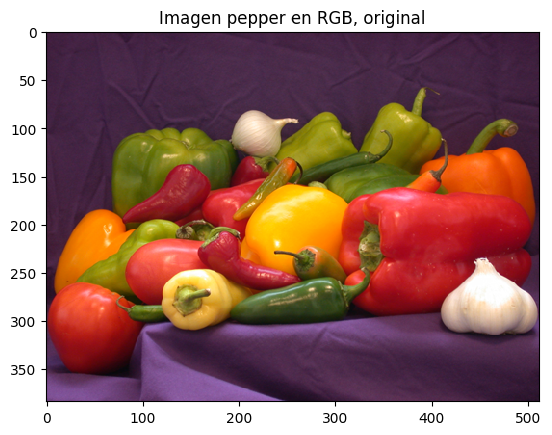

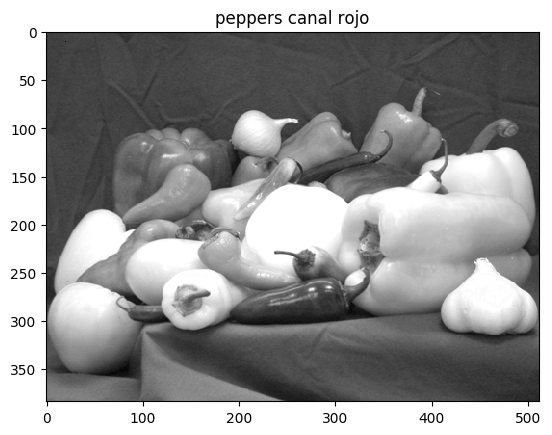

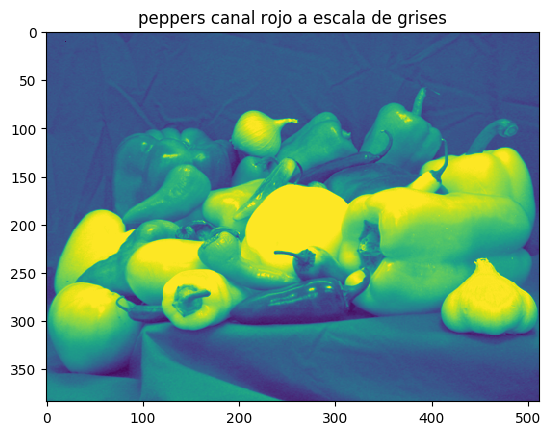

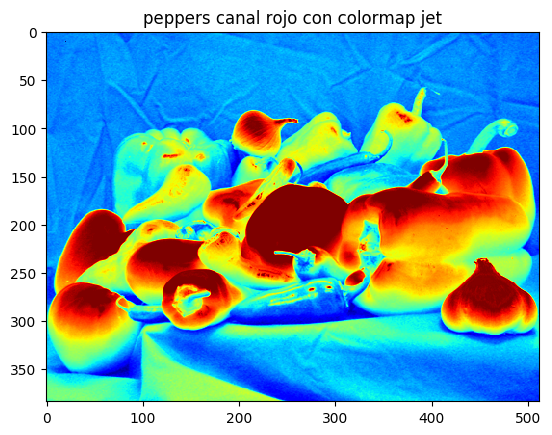

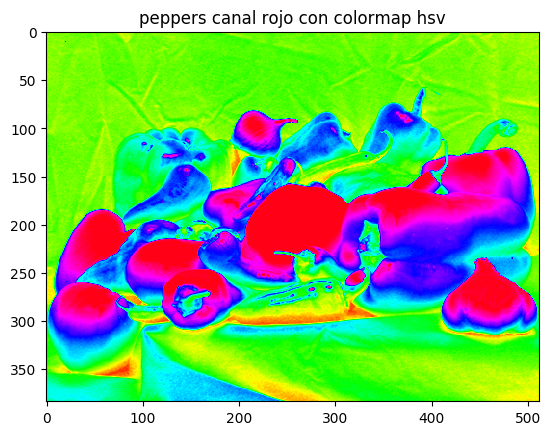

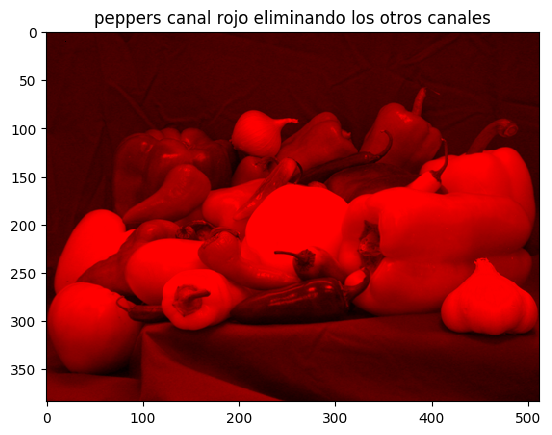

In [0]:
##-WRITE YOUR CODE HERE--

img = cv2.imread('peppers.png');
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.title("Imagen pepper en RGB, original");
plt.imshow(img);
plt.show();

## APARTADO 1
img_red =img[:,:,0];()
plt.title("peppers canal rojo");
plt.imshow(img_red,cmap="gray");
plt.show();

plt.title("peppers canal rojo a escala de grises");
plt.imshow(img_red);
plt.show();

"""La componente roja de los pimientos naranjas y amarillos es mayor ya que
es la resultante de los valores máximos de azul y verde respectivamente,
mientras que los pimientos rojos no tienen por qué tener el valor máximo
en el rojo."""

## APARTADO 2

plt.title("peppers canal rojo con colormap jet");
plt.imshow(img_red,cmap="jet");
plt.show();

plt.title("peppers canal rojo con colormap hsv");
plt.imshow(img_red,cmap="hsv");
plt.show();

## APARTADO 3

img_red_only = np.copy(img);
img_red_only [:,:,1]=0;
img_red_only [:,:,2]=0;
plt.title("peppers canal rojo eliminando los otros canales");
plt.imshow(img_red_only);
plt.show();


#### 2.2 RGB Y HSV

Matplotlib puede pasar de formato RGB a HSV:

```python
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv
imagen_rgb=hsv_to_rgb(imagen_hsv)
imagen_rgb=hsv_to_rgb(imagen_hsv)

```

El siguiente extracto de la descripción de la función HSV2RGB te puede ayudar a tener una idea sobre los rangos de variación de H,S y V.

As H(:,0) varies from 0 to 1, the resulting color varies from red through yellow, green, cyan, blue, and magenta, and returns to red. When H(:,1) is 0, the colors are unsaturated (i.e., shades of gray). When H(:,1) is 1, the colors are fully saturated (i.e., they contain no white component). As H(:,2) varies from 0 to 1, the brightness increases.


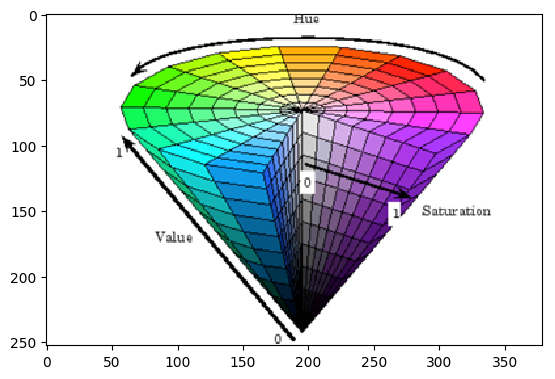

In [0]:
#@title
logo = cv2.imread('notebook_images/hsv.png')
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))
plt.show()

#### Ejercicio 3
Genere la siguiente imagen. Obtenga los colores en RGB. Para
ello genere las sub-imágenes cuadradas de cada color y concaténelas, utilizando la función np.concatenate.

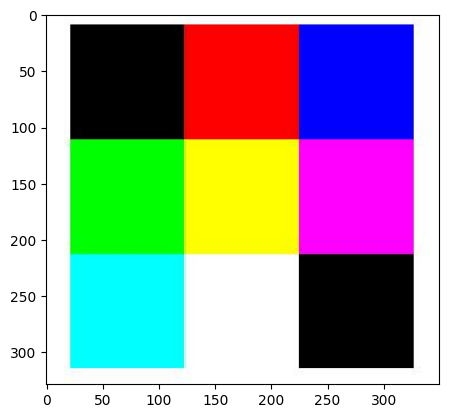

In [0]:
#@title
logo = cv2.imread('notebook_images/mosaico_rgb.png')
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))
plt.show()

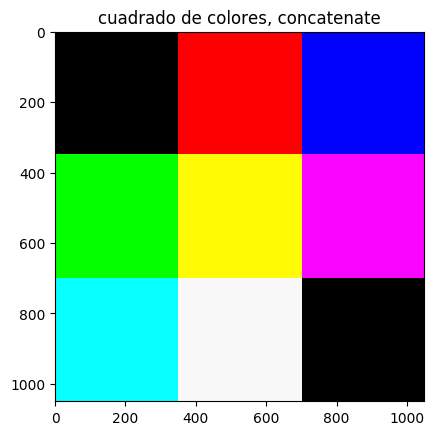

In [0]:
# --WRITE YOUR CODE HERE--

m = np.ones((350,350));

rectangle_1 = np.concatenate((m,m*2,m*3),axis=1);
rectangle_2 = np.concatenate((m*4,m*5,m*6),axis=1);
rectangle_3 = np.concatenate((m*7,m*8,m*9),axis=1);
square = np.concatenate((rectangle_1,rectangle_2,rectangle_3),axis=0);

colormapsquare = [(0,0,0),(1,0,0),(0,0,1),(0,1,0),(1,1,0),(1,0,1),(0,1,1),(1,1,1),(0,0,0)];
cm2 = LinearSegmentedColormap.from_list('cm2',colormapsquare);

plt.title("cuadrado de colores, concatenate");
plt.imshow(square,cmap=cm2);
plt.show();


#### Ejercicio 4
* ¿Cuáles son las coordinadas del color rojo en una imagen HSV? Construye una imagen roja de tamaño 200x200.
* Convierte la imagen a formato RGB (hsv_to_rgb). Muéstrala por pantalla utilizando imshow. ¿Cuáles son las coordenadas del color rojo en formato RGB?
* Vuelva a la imagen HSV original, pruebe varios valores para S y V, y visualice los resultados.
Observe siempre las correspondencias entre HSV y RGB, ¿Qué sistema le resulta más
intuitivo para definir un color? 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


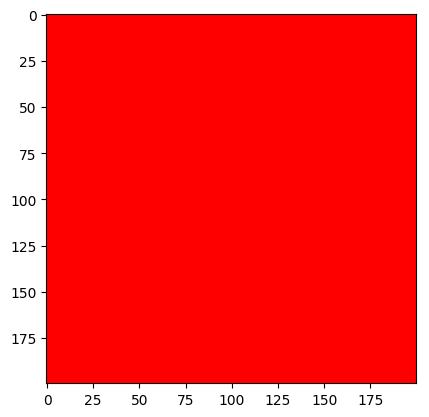

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


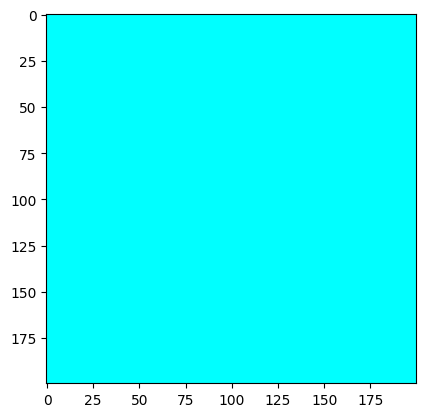

In [0]:
# --WRITE YOUR CODE HERE--

## APARTADO 1

""" Las coordinadas del color rojo en una imagen HSV serían (0º,100,100)  """

m = np.ones((200,200,3));
m[:,:,0]=0;
m[:,:,1]=100;
m[:,:,2]=100;

## APARTADO 2

""" Las coordinadas del color rojo en una imagen RGB serían (255,0,0)  """

from matplotlib.colors import hsv_to_rgb, rgb_to_hsv
imagen_rgb=hsv_to_rgb(m);

plt.imshow(imagen_rgb);
plt.show();

## APARTADO 3

imagen_hsv = rgb_to_hsv(imagen_rgb);
plt.imshow(imagen_hsv);
plt.show();